# EDLCC's na Prática - Modelos Matemáticos

O objetivo da ciência é compreender fenômenos complexos.  
O fenômeno em questão pode ser uma parte da natureza, um grupo de indivíduos sociais, a situação do tráfego veicular em Goiânia e assim por diante. 

Toda abordagem científica é adotada com o intuito de se obter a compreensão do fenômeno a partir de um **modelo matemático** cujas propriedades possam ser analisadas e discutidas. A ideia central é que o **modelo matemático** proporcione um método mais fácil de entendimento do fenômeno, mas que ainda seja complexo o suficiente para preservar as características cruciais do fenômeno modelado.  

> `Essencialmente, todos os modelos estão errados, mas alguns são úteis`; **George Edward Pelham Box**, estatístico britânico, 1919-2013.

A **modelagem** é, de fato, uma ideia geral com aplicações muito além da ciência. Suponha, por exemplo, que você queira convidar um amigo para ir à sua casa pela primeira vez. Para ajudar seu amigo, você pode enviar um mapa da sua vizinhança. Esse mapa é um **modelo**: ele expõe os marcos mais importantes e deixa de fora bilhões de detalhes que seu amigo pode ignorar para chegar à sua casa. Isto é a essência da modelagem: **um bom modelo deve ser o mais simples possível, mas ainda rico o suficiente para incluir as características importantes que o fenômeno modelado exige**.

> `Tudo deve ser apresentado da maneira mais simples possível, porém não mais simples do que isso`; **Albert Einstein**, físico, 1879-1955.  

Certamente, as ferramentas aplicadas na modelagem de um determinado fenômeno diferem muito nas diversas disciplinas científicas. Nas ciências naturais, a Matemática ganhou uma posição única como ferramenta-chave para a formulação de modelos. Para estabelecer um modelo, você precisa entender o problema em questão e descrevê-lo com matemática. Normalmente, esse processo resulta num conjunto de equações que devem ser resolvidas para se avaliar o quão realisticamente o modelo descreve o fenômeno.  

As **Equações de Diferenças** representam um dos tipos mais simples e eficazes de equações usadas em modelos matemáticos. A matemática é simples e a programação é simples, permitindo que se foque mais na modelagem.

# Exemplos de Modelagem Matemática

## Taxa de Juros
Nosso primeiro modelo com Equação de Diferença diz respeito a quanto dinheiro um valor inicial $x_0$ vai render depois de $n$ anos em um banco com taxa de juros anual $p$.  
$$ x_n = x_0 \left (1 + \frac{p}{100} \right)^n $$  

Infelizmente, essa fórmula surge após algumas suposições limitantes, como a de uma taxa de juros constante ao longo de todos os $n$ anos. Além disso, a fórmula só nos dá a quantia depois de cada ano, não depois de alguns meses ou dias. É muito mais fácil calcular com taxas de juros se configurarmos um modelo em termos de Equação de Diferença e, pois nos permite resolvê-la num computador.

O modelo fundamental para as taxas de juros é que uma quantia $x_{n − 1}$ em algum ponto do tempo $t_{n − 1}$ aumenta seu valor com $p$ por cento para uma quantia $x_n$ em outro ponto do tempo $t_n$:  

$$x_n=x_{n−1}+\frac{p}{100}x_{n−1}$$ 
<center>ou</center>
$$x[n]=x[n-1]+\frac{p}{100}x[n-1]=x[n-1]\left(1+\frac{p}{100}\right)$$

Se a variável $n$ conta os anos, $p$ é a taxa de juros anual, e se $p$ é constante, podemos com alguns cálculos aritméticos derivar a seguinte solução:  

$$x_n=\left(1+\frac{p}{100}\right ) x_{n−1}=\left (1+\frac{p}{100}\right)^2x_{n−2}=…=\left(1+\frac{p}{100}\right)^nx_0$$  

Em vez de primeiro derivar uma fórmula para $x_n$ e depois programar esta fórmula, podemos atacar o modelo fundamental com um *script* Python e calcular $x_1$, $x_2$ e assim por diante:

[100.         115.         132.25       152.0875     174.900625
 201.13571875 231.30607656 266.00198805 305.90228625 351.78762919
 404.55577357]


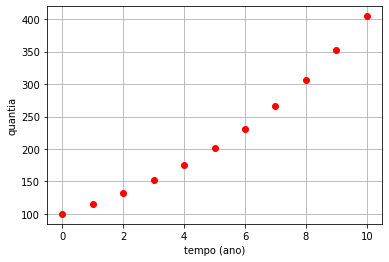

In [2]:
from numpy import zeros
from pylab import plot, xlabel, ylabel, grid
x0 = 100                      # quantia inicial
p = 15                        # taxa de juros: 5% a.a.
N = 10                        # tempo de investimento (em anos)
tempo = range(N+1)
x = zeros(len(tempo))
# print(x)

# Calcula a solução
x[0] = x0                     # capital inicial
for n in tempo[1:]:
    x[n] = x[n-1] * (1 + p/100)
print(x)
plot(tempo, x, 'ro'); xlabel('tempo (ano)'); ylabel('quantia'); grid(True)

Suponha agora que estamos interessados em calcular o rendimento do dinheiro após $N$ dias. A taxa de juros por dia é considerada como $r = p/D$ se $p$ for a taxa de juros anual e $D$ for o número de dias num ano. O modelo fundamental é o mesmo, mas agora $n$ conta dias e $p$ é substituído por $r$:

$$x_n=x_{n−1}+\frac{r}{100}x_{n−1}$$
<center>ou</center>
$$x[n]=x[n-1]+\frac{r}{100}x[n-1]=x[n-1]\left(1+\frac{r}{100}\right)$$

Uma prática comum em negócios internacionais é usar $D = 360$, mas pode-se também usar $n$ como o número exato de dias entre duas datas. Python tem um **módulo** chamado **`datetime`** usado nos cálculos com datas e horas. Para encontrar o número de dias entre duas datas, usamos:

In [3]:
import datetime as dt
data1 = dt.date(2020, 3, 15)  # 15/03/2020  (início da pandemia)
data2 = dt.date(2022, 9, 20)
dif = data2 - data1
print(f'{dif.days} dias')

919 dias


Podemos modificar o *script* anterior para calcular em dias ao invés de anos:

[146.03426729 146.0951149  146.15598787 146.2168862  146.2778099
 146.33875899 146.39973347 146.46073336 146.52175866 146.5828094 ]


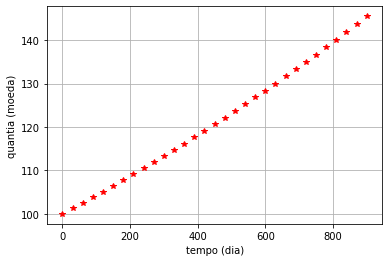

In [8]:
x0 = 100                      # quantia inicial
p = 15                        # taxa de juros anual (%)
r = p/360                     # taxa de juros diária (%)
N = dif.days                  # base de tempo
tempo = range(N+1)
x = zeros(len(tempo))

# Calcula a solução da EDLCC recursivamente
x[0] = x0
for n in tempo[1:]:
    x[n] = x[n-1] + (r/100.0)*x[n-1]
print(x[-11:-1])              # saldo nos últimos 10 dias
plot(tempo[::30], x[::30], 'r*'); xlabel('tempo (dia)'); ylabel('quantia (moeda)'); grid(True)

Quando a taxa de juros $r$ varia com o tempo, como acontece na vida real, será preciso um ajuste no modelo, escrevendo $r[n]$ para indicar explicitamente a dependência ao tempo. A taxa de juros anual dependente do tempo  é a taxa normalmente especificada e $p[n]$ é geralmente uma função constante (a taxa de juros é alterada em datas específicas e permanece constante até a próxima alteração). A construção de um vetor $p$ num programa, dadas as datas em que $p$ é alterada, pode ser um pouco complicado, pois precisamos calcular o número de dias entre as datas das mudanças do índice $p$. Por ora, vamos assumir um vetor $p$ com as taxas de juros anuais dependentes do tempo para cada dia do período total de aplicação.  

[105.87180472 105.88931097 105.90683402 105.92437389 105.94193057
 105.95950407 105.9770944  105.99470158 106.0123256  106.02996647]


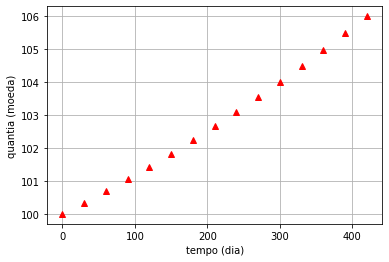

In [10]:
from numpy import zeros, linspace
from pylab import plot, xlabel, ylabel, grid, title
from datetime import date

data1 = date(2020, 11, 3)
data2 = date(2021, 12, 31)
dif = data2 - data1
N = dif.days                  # dias do período de aplicação
tempo = range(N+1)
p = linspace(4,6,len(tempo))  # taxa de juros anual (%)
r = p/360                     # taxa de juros diária (%)
x0 = 100                      # quantia inicial
x = zeros(len(tempo))

# Calcula a solução
x[0] = x0
for n in tempo[1:]:
    x[n] = x[n-1] + (r[n-1]/100.0)*x[n-1]
print(x[-11:-1])              # saldo nos últimos 10 dias
plot(tempo[::30], x[::30], 'r^'); xlabel('tempo (dia)'); ylabel('quantia (moeda)'); grid(True)

## Fatorial

A Equação de Diferenças,
$$x_n = n.x_{n − 1}, \rm{com\;} x_0 = 1$$  
pode ser rapidamente resolvida recursivamente:
$$x_n = n.x_{n − 1} = n.(n − 1). x_{n − 2} = n.(n − 1).(n − 2).x_{n − 3} = n.(n − 1).(n − 2) ⋯ 1$$
<center>ou</center>
$$x[n]=n.x[n-1]$$

O resultado $x_n$ nada mais é do que o fatorial de $n$, denotado como $n!$. 

In [13]:
N = 7
x = zeros(N+1, dtype=int)
# print(x)

# Calcula a solução
x[0] = 1
for n in range(1,N+1):
    x[n] = n*x[n-1]
print(f"{N}! = {x[-1]}")      # fatorial de N: N!
print(x)

7! = 5040
[   1    1    2    6   24  120  720 5040]


## Série de Fibonacci
Todo livro didático com algum material sobre sequências geralmente apresenta uma Equação de Diferenças para gerar a **Série de Fibonacci**:  
$$x_n = x_{n − 1} + x_{n − 2}, x_0 = 1, x_1 = 1, n = 2,3,…$$
<center>ou</center>
$$x[n]=x[n-1] + x[n-2],\;\;\;$$ com $x[0]=1$ e $x[1]=1$

Essa equação relaciona três elementos da sequência, não apenas dois como nos exemplos anteriores. Esta **Equação de Diferenças** é dita ser de **segunda ordem**, enquanto que para os exemplos anteriores envolvendo dois elementos na sequência são consideradas Equações de Diferenças de primeira ordem. Essa classificação não é importante para calcular a solução num programa, mas para métodos de solução analíticos com papel e caneta, a classificação ajuda a determinar a técnica matemática adequada à solução da equação.

Um *script* simples para gerar a **Série de Fibonacci** é mostrado a seguir:

In [14]:
N = int(input("Quantidade de termos da Série de Fibonacci: "))
if N > 1:
    x = zeros(N, int)
    x[0] = 1
    x[1] = 1
    for n in range(2, N):
        x[n] = x[n-1] + x[n-2]
    print(f"Série de Fibonacci com {N} termos: {x}")
else:
    print('N deve ser maior que 1!')

Quantidade de termos da Série de Fibonacci: 10
Série de Fibonacci com 10 termos: [ 1  1  2  3  5  8 13 21 34 55]


Como $x_n$ (ou `x[n]`) é uma sequência infinita, poderíamos tentar executar o programa para valores de $N$ bem grandes. Isso provoca dois problemas: os requisitos de armazenamento do vetor `x` podem se tornar muito grandes para o computador, mas muito antes que isso aconteça, o tamanho de `x[n]` vai muito além do maior número inteiro que pode ser representado por elementos `int` em *arrays* (o problema já aparece para `N = 50`). Uma possibilidade é usar elementos de array do tipo `int64` que permite o cálculo de duas vezes mais números do que os elementos do tipo `int` padrão. Uma solução melhor é usar valores de ponto flutuantes no vetor `x[n]`, apesar do fato de que os números em `x[n]` sejam inteiros. Com elementos `float96`, podemos calcular até `N = 23600`.  

A melhor solução que consome menos memória é aquela que usa vetor de três elementos para gerar a sequência. Portanto, podemos trabalhar com apenas três variáveis do tipo `int` padrão em Python:

In [22]:
N = int(input("Qtde de termos da Série de Fibonacci: "))
if N > 1:
    fib1 = 1
    fib2 = 1
    n = 2
    print('[', fib1, fib2, end=" ")
    while n < N:
        fibn = fib1 + fib2
        print('%d ' % fibn, end="")
        fib1 = fib2
        fib2 = fibn
        n += 1
    print("]")
else:
    print('N deve ser maior que 1!')

Qtde de termos da Série de Fibonacci: 20
[ 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 ]


A vantagem dos números inteiros nativos do Python (ao contrário dos elementos `int` em arranjos **NumPy**) é que eles podem conter inteiros de tamanho arbitrário. Quando o número inteiro é muito grande para o objeto `int` comum, `fibn` se torna um objeto `inteiro longo` que pode conter números inteiros tão grandes quanto a memória do computador permitir. Podemos tentar uma execução com **N** valendo **250**, por exemplo, para produzir o termo de valor 7896325826131730509282738943634332893686268675876375.

Nos cursos de matemática, você aprende como derivar uma fórmula para o $n$-ésimo termo da Séria de Fibonacci. Essa derivação é muito mais complicada do que escrever um simples *script* para gerar a sequência, mas há muita matemática interessante na derivação e na fórmula resultante!

## Crescimento de uma População  

Seja $x_{n − 1}$ o número de indivíduos de uma população no tempo $t_{n − 1}$. A população pode consistir em humanos, animais, células ou quaisquer objetos em que o número de nascimentos e mortes seja proporcional ao número de indivíduos. Entre os tempo $t_{n − 1}$ e $t_n$, nascem $b.x_{n − 1}$ indivíduos e $dx_{n − 1}$ indivíduos morrem, onde $b$ e $d$ são valores constantes. O crescimento líquido da população é então $(b − d).x_n$. Usando $r = (b − d).100$ para o fator de crescimento líquido medido em porcentagem, o número de indivíduos a cada período é dado por:
$$x_n = x_{n − 1} + \frac{r}{100}.x_{n − 1}$$

Esta é a mesma Equação de Diferenças usada no cálculo da **Taxa de Juros**. Ela modela o crescimento das populações muito bem, desde que haja condições ideais de crescimento para cada indivíduo. Caso contrário, pode-se ajustar o modelo conforme explicado na seção seguinte, **Crescimento Logístico**.

Para resolver a EDLCC anterior, precisamos começar com um tamanho conhecido $x_0$ da população. Os parâmetros $b$ e $d$ dependem da diferença de tempo $t_n − t_{n − 1}$, ou seja, os valores de $b$ e $d$ são menores se $n$ contar anos do que se $n$ contar gerações.

## Crescimento Logístico
A Equação de Diferenças para o crescimento de uma população leva a um aumento exponencial no número de indivíduos. O tamanho da população aumenta cada vez mais rápido conforme o tempo $n$ aumenta e $x_n \rightarrow \infty$ quando $n \rightarrow \infty$. Na vida real, entretanto, existe um limite superior $M$ da quantidade de indivíduos que podem existir no ambiente ao mesmo tempo. Falta de espaço e alimento, competição entre indivíduos, predadores e disseminação de doenças contagiosas são exemplos de fatores que limitam o crescimento. O número $M$ é geralmente chamado de **capacidade de carga do meio ambiente**, a população máxima que é sustentável ao longo do tempo. Com crescimento limitado, o fator de crescimento $r$ deve depender do tempo:  
$$x_n = x_{n − 1} + \frac{r(n − 1)}{100}x_{n − 1}$$
<center>ou</center>
$$x[n]=x[n-1] + \frac{r[n − 1]}{100}x[n − 1]=x[n-1] \left(1+ \frac{r(n − 1)}{100}\right)$$

No início do processo de crescimento populacional, há recursos suficientes e o crescimento é exponencial, mas à medida que $x_n$ se aproxima de $M$, o crescimento de $r$ deve tender a zero. Uma função simples $r(n)$ com essa propriedade de limitação é mostrada a seguir:
$$r(n) = \rho \left (1 − \frac{x_n}{M}\right)$$

Para valores pequenos de $n$, $x_n \ll M$ e $r(n) \approx \rho$, que é a taxa de crescimento com recursos ilimitados. Como $x_n \rightarrow M$, $r(n) \rightarrow 0$ como se queria. A equação anterior é usada para modelar o crescimento logístico. A Equação de Diferenças logística correspondente torna-se:
$$x_n = x_{n − 1} + \frac{\rho}{100}x_{n − 1}\left (1 − \frac{x_{n-1}}{M}\right)$$
<center>ou</center>
$$x[n]=x[n-1] + \frac{\rho}{100}x[n − 1]\left (1 − \frac{x[n-1]}{M}\right)$$

Vamos simular para `N = 200` intervalos de tempo começando com uma população de `x[0] = 100` indivíduos, uma capacidade de carga de `M = 500` e crescimento inicial de $\rho = 4$ por cento em cada intervalo de tempo:

[499.08681289 499.12327366 499.15828122 499.19189329 499.22416532
 499.25515055 499.28490015 499.31346323 499.340887   499.36721676]


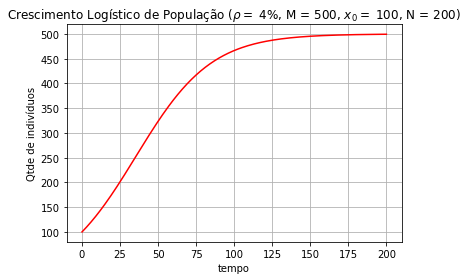

In [85]:
x0 = 100              # quantia inicial de indivíduos
M = 500               # capacidade de carga
rho = 4               # taxa de crescimento inicial em porcentagem
N = 200               # número de intervalos de tempo
tempo = range(N+1)
x = zeros(len(tempo))
x[0] = x0
for n in tempo[1:]:
    x[n] = x[n-1] + (rho/100.0) * x[n-1] * (1 - x[n-1] / M)
print(x[-11:-1])
plot(tempo, x, 'r'); xlabel('tempo'); ylabel('Qtde de indivíduos'); grid('on')
title("Crescimento Logístico de População " \
      + r"($\rho =$ %d%%, M = %d, $x_0 =$ %.0f, N = %d)" % (rho,M,x[0],N));

O gráfico anterior mostra como a população se estabiliza, ou seja, que $x_n$ se aproxima de $M$ conforme $n$ se torna grande.

## Reembolso de Empréstimo  
Vamos supor um empréstimo $L$ que deve ser pago em $N$ meses. A prestação a ser paga por mês consiste na fração $L/N$ mais os juros do empréstimo. Suponha que a taxa de juros anual do empréstimo seja $p$ por cento. A taxa de juros mensal é então $p/12$. O valor do empréstimo após o mês $n$ é $x_n$, e a mudança em função de $x_{n − 1}$ pode ser modelada como:
$$x_n = x_{n − 1} + \frac{p}{12⋅100}.x_{n − 1}− \left (\frac{p}{12⋅100}.x_{n − 1} + \frac{L}{N} \right) = x_{n − 1} − \frac{L}{N}$$

para $n = 1,…, N$. A condição inicial é $x_0 = L$. A solução matemática de equações não homogêneas é mais difícil de encontrar do que a solução de equações homogêneas, mas em termos de programação não há grande diferença: apenas adicionamos o termo extra $−L/N$ na Equação de Diferenças.

A solução da equação anterior não é particularmente importante para o tomador do empréstimo que apenas fica sabendo do tamanho da dívida. O que é mais interessante é o que ele deve pagar a cada mês, $y_n$. Pode-se acompanhar o valor da parcela, $y_n$, e o saldo da dívida, $x_n$, em uma variante do modelo anterior:
$$y_n = \frac{p}{12⋅100}.x_{n − 1} + \frac{L}{N}$$
$$x_n = x_{n − 1} + \frac{p}{12⋅100}.x_{n − 1}− y_n$$

As duas equações anteriores compõem um sistema de Equações de Diferenças. Em um *script*, simplesmente atualizamos `y[n]` primeiro e, em seguida, atualizamos `x[n]`, dentro de um laço sobre `n`.

## Integral como Equação de Diferenças
Suponha que uma função $f(x)$ seja definida como a integral:
$$f(x) = \int\limits_{a}^x g(t)dt$$

Nosso objetivo é avaliar $f(x)$ em um conjunto de pontos $x_0 = a < x_1 ⋯ < x_N$. O valor $f(x_n)$ para qualquer $0≤n≤N$ pode ser obtido usando a regra trapezoidal para integração:
$$f(x_n) = \sum_{k=0}^{n-1} \frac{1}{2}(x_{k+1}-x_k)(g(x_k) + g(x_{k+1}))$$

que nada mais é do que a soma das áreas dos trapézios até o ponto $x_n$. Percebemos que $f(x_{n + 1})$ é a soma dada pela equação anterior mais a área do próximo trapézio:
$$f(x_{n+1}) = f(x_n) + \frac{1}{2}(x_{n+1}-x_n)(g(x_n) + g(x_{n+1}))$$

Esta é uma fórmula muito mais eficiente do que usar o somatório, apenas substituindo $n$ por $n + 1$, uma vez que não precisamos recalcular as áreas dos primeiros $n$ trapézios.

A última equação mostra a ideia de calcular todos os valores $f(x_n)$ por meio de uma Equação de Diferenças. Defina $f_n$ como $f(xn)$ e considere $x_0 = a$ e $x_1,…, x_N$ como dado. Sabemos que $f_0 = 0$. Então:  
$$f_n = f_{n-1} + \frac{1}{2}(x_{n}-x_{n-1})(g(x_{n-1}) + g(x_n))$$

para $n = 1,2,…, N$. Ao introduzir $g_n$ para $g(x_n)$ como uma variável extra na Equação de Diferenças, podemos evitar recalcular $g(x_n)$ quando calculamos $f_{n + 1}$:  
$$\begin{align}
g_n &= g(x_n)\\ 
f_n &= f_{n-1} + \frac{1}{2}(x_{n}-x_{n-1})(g_{n-1} + g_n)
\end{align}$$

com as condições iniciais $f_0 = 0$ e $g_0 = g(a)$.

Uma função de um *script* pode receber `g`, `a`, `x` e `N` como entrada e retornar matrizes $x$ e $f$ para $x_0,…, x_N$ e os valores integrais correspondentes $f_0,…, f_N$:  

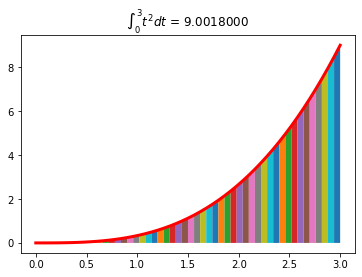

In [24]:
from numpy import zeros_like, exp, sqrt, linspace
import pylab as plt
def g(x):                     # função a ser integrada
    return x*x                # exemplo: função quadrática

def integral(g, a, b, N=20):
    """ Calcula a integral da função g(x), usando o método trapezoidal
          g - função a ser integrada
          a - limite inferior da integral
          b - limite superior da integral
          N - qtde de fatias no tempo
    """
    tempo = range(N+1)
    x_ = linspace(a, b, N+1)
    g_ = zeros_like(x_)
    f_ = zeros_like(x_)
    g_[0] = g(x_[0])
    f_[0] = 0

    for n in tempo[1:]:
        g_[n] = g(x_[n])
        f_[n] = f_[n-1] + 0.5*(x_[n] - x_[n-1])*(g_[n-1] + g_[n])
    return x_, f_

t, area = integral(g,0,3,50)  # integral de x^2, de 0 a 3: x^3/3 {0 a 3} = 3^3/3 = 9
x0,y0 = t[0], area[0]
for i, xf in enumerate(t):
    yf = area[i]
    plt.fill_between([x0,xf],[y0,yf]);
    x0,y0 = xf,yf
plt.plot(t,area,color='r',linewidth=3)
plt.title("$\int_{0}^3 t^2 dt$ = %.7f" % area[-1]);
# print(area)

## Série de Taylor como Equação de Diferenças
Considere o seguinte sistema de duas Equações de Diferenças:
$$\begin{align}
e_n &= e_{n-1} + a_{n-1}\\ 
a_n &= {x\over n} a_{n-1}
\end{align}$$

Com condições iniciais $e_0 = 0$ e $a_0 = 1$. Podemos começar a aninhar a solução:
$$\begin{align*}
e_1 &= 0 + a_0 = 0 + 1 = 1,\\ 
a_1 &= x,\\ 
e_2 &= e_1 + a_1= 1+x,\\ 
a_2 &= {x\over2}a_1 = {x^2\over 2},\\ 
e_3 &= e_2 + a_2 = 1 + x + {x^2\over 2},\\ 
e_4 &= 1 + x + {x^2\over 2} + {x^3\over 3\cdot 2},\\ 
e_5 &= 1 + x + {x^2\over 2} + {x^3\over 3\cdot 2} + {x^4\over 4\cdot 3\cdot 2}
\end{align*}$$

O leitor atento às aulas de cálculo sobre a **Série Taylor** deve ter reconhecido isso como a série Taylor de $e^x$:
$$ e^x= \sum_{n=0}^\infty {x^n\over n!}$$

Como derivamos um sistema como esse para calcular a aproximação polinomial de Taylor para $e^x$? O ponto de partida é a soma $ \sum_{n=0}^\infty {x^n\over n!}$. Essa soma é codificada pela adição de novos termos a uma variável de acumulação em um loop. A contrapartida matemática deste código é uma Equação de Diferenças:
$$e_{n+1} = e_{n} + {x^{n}\over {n}!},\quad e_{0}=0,\ n=0,1,2,\ldots$$

ou de forma equivalente (apenas substituindo $n$ por $n − 1$):  
$$e_{n} = e_{n-1} + {x^{n-1}\over {(n-1)}!},\quad e_{0}=0,\ n=0,1,2,\ldots$$

Agora vem a observação importante: o termo $x_n/n!$ contém muitos dos cálculos que já executamos para o termo anterior $x_{n − 1}/(n − 1)!$ porque
$$\begin{equation*} {x^{n}\over n!} = {x\cdot x \cdots x\over n(n-1)(n-2)\cdots 1},\quad
{x^{n-1}\over (n-1)!} = {x\cdot x \cdots x\over (n-1)(n-2)(n-3)\cdots 1}\end{equation*}$$

Seja $a_n = x^n / n!$. Vemos que podemos ir de $a_{n − 1}$ para $a_n$ multiplicando $a_{n − 1}$ por $x / n$:
$${x\over n}a_{n-1}={x\over n}{x^{n-1}\over (n-1)!} = {x^n\over n!}= a_{n}$$

que nada mais é do que Equação de Diferenças anterior. Também percebemos que $a_0 = 1$ é a condição inicial para esta Equação de Diferenças. Em outras palavras, uma equação faz a soma do polinômio de Taylor e a outra atualiza cada termo da soma.

In [115]:
def exp_eqdif(x, N):
    n = 1
    an_prev = 1.0                 # pimeiro termo, a_0
    en_prev = 0.0                 # primeira soma, e_0
    while n <= N:
        en = en_prev + an_prev
        an = x/n * an_prev
        en_prev, an_prev = en, an
        n += 1
    return en

Observe que não armazenamos as sequências em vetores, mas aproveitamos o fato de que apenas o elemento da sequência mais recente é necessário para calcular um novo elemento. A função acima junto com uma avaliação direta da série de Taylor para $e^x$ e uma comparação com o resultado exato para vários valores $N$ podem ser visto no *script* seguinte:

In [123]:
# Avaliação direta da soma
def exp_soma(x, N):
    fat = 1
    e = 0
    for n in range(N):
        e += x**n / fat
        fat = fat * (n+1)
    return e

import sys, math
x = 1.
print('exp(%g) = %.15f' % (x, math.exp(x)))
for N in 2, 4, 8, 16, 32, 64:
    print('   N = %3d  exp_eqdif = %.15f  exp_soma = %.15f' % (N, exp_eqdif(x,N), exp_soma(x,N)))

exp(1) = 2.718281828459045
   N =   2  exp_eqdif = 2.000000000000000  exp_soma = 2.000000000000000
   N =   4  exp_eqdif = 2.666666666666667  exp_soma = 2.666666666666667
   N =   8  exp_eqdif = 2.718253968253968  exp_soma = 2.718253968253968
   N =  16  exp_eqdif = 2.718281828458995  exp_soma = 2.718281828458995
   N =  32  exp_eqdif = 2.718281828459046  exp_soma = 2.718281828459046
   N =  64  exp_eqdif = 2.718281828459046  exp_soma = 2.718281828459046


## Ganhando a Vida com uma Fortuna
Suponha que você recebeu uma fortuna $F$ (herança, loteria etc.). Você investiu o dinheiro de uma forma segura, com juros de $p$ por cento ao ano. Você planeja consumir uma quantidade $c_n$, onde $n$ indica os anos. O desenvolvimento de sua fortuna $x_n$ de um ano para o outro pode então ser modelado por:
$$x_n = x_{n-1} + {p\over 100}x_{n-1} - c_{n-1},\quad x_0=F$$
<center>ou</center>
$$x[n]=x[n-1] + \frac{p}{100}x[n − 1]- c[n-1], \quad x[0]=F$$

Um exemplo simples é manter $c_n$ constante, digamos $q$ por cento dos juros no primeiro ano:
$$x_n = x_{n-1} + {p\over 100}x_{n-1} - {q\over 100}\left({p\over 100}F\right),\quad x_0=F$$

Um modelo mais realista é assumir uma inflação de 2% ao ano. Então, você gostaria de aumentar $c_n$ o custo da inflação. Podemos estender o modelo de duas maneiras. A maneira mais simples e clara, é acompanhar a evolução das duas sequências, $x_n$ e $c_n$:
$$\begin{align}x_n &= x_{n-1} + {p\over 100}x_{n-1} - c_{n-1},\quad x_0=F, c_0 = {pq\over 10^4}F \\ 
c_n &= c_{n-1} + {I\over100}c_{n-1}\end{align}$$

Este é um sistema de duas Equações de Diferenças com duas incógnitas. O método de solução, no entanto, não é muito mais complicado do que o método para uma Equação de Diferenças com uma incógnita, uma vez que podemos primeiro calcular $x_n$ e depois atualizar o valor $c_n$. Você é incentivado a escrever um *script* para fazer isso.

Outra maneira de fazer a Equação de Diferenças para incluir o custo da inflação é usar uma fórmula explícita para $c_{n − 1}$. Então podemos inserir a fórmula mostrada a seguir na Eq. de Diferenças anterior:
$$c_{n-1} = \left( 1 + {I\over 100}\right)^{n-1} {pq\over 10^4}F$$

onde $I$ é a taxa de inflação anual.
$$x_n = x_{n-1} + {p\over 100}x_{n-1} - \left( 1 + {I\over 100}\right)^{n-1} {pq\over 10^4}F,\quad x_0=F$$

## Método de Newton
A Equação de Diferenças:
$$x_n = x_{n-1} - {f(x_{n-1})\over f'(x_{n-1})},\quad \hbox{ dado } x_0$$

gera uma sequência $x_n$ onde, se a sequência converge (ou seja, se $x_n − x_{n − 1} \rightarrow 0$), $x_n$ se aproxima de uma raiz de $f(x)$. Ou seja, $x_n \rightarrow x$, onde $x$ resolve a equação $f(x) = 0$. A equação anterior é o famoso **método de Newton** para resolver equações algébricas não lineares $f(x) = 0$. Quando $f(x)$ não é linear, ou seja, $f(x)$ não está na forma $a.x + b$ (equação de uma reta) com constantes $a$ e $b$, a equação torna-se uma Equação de Diferenças não linear. Isso complica o tratamento analítico das Equações de Diferenças, mas não apresenta dificuldades extras para a solução numérica (computacional).

Suponha que queremos resolver a equação: $f(x)=0$.

e que já temos uma solução aproximada $x_{n − 1}$. Se $f(x)$ fosse linear, $f(x) = a.x + b$, seria muito fácil resolver $f(x) = 0$: $x = -b / a$. A ideia é, portanto, aproximar $f(x)$ na vizinhança de $x = x_{n − 1}$ por uma função linear, ou seja, uma reta $f(x) \approx f(x) = a.x + b$. Esta reta deve ter a mesma inclinação que $f(x)$, ou seja, $a = f′(x_{n − 1})$, e ambas, a reta e $f$, devem ter o mesmo valor em $x = x_{n − 1}$. Desta condição pode-se encontrar $b = f(x_{n − 1}) −x_{n − 1}f′(x_{n − 1})$. A função aproximada (reta) é então:
$$\tilde f(x) = f(x_{n-1}) + f'(x_{n-1})(x-x_{n-1})$$

Essa expressão contém apenas os dois primeiros termos de uma aproximação da **Série de Taylor** para $f(x)$ em $x = x_{n − 1}$. Agora é fácil resolver $f(x) = 0$ em relação a $x$, e obtemos:
$$x = x_{n-1} - {f(x_{n-1})\over f'(x_{n-1})}$$

Uma vez que $\tilde f$ é apenas uma aproximação de $f$, $x$ é apenas uma aproximação de uma raiz de $f(x) = 0$. Felizmente, a aproximação é melhor do que $x_{n − 1}$, portanto, definimos $x_n = x$ como o próximo termo em uma sequência que esperamos que convirja para a raiz correta. No entanto, a convergência depende muito da forma de $f(x)$, e não há garantia de que o método funcionará sempre.

Os programas anteriores para resolver Equações de Diferenças normalmente calcularam uma sequência $x_n$ até $n = N$, onde $N$ é dado. Ao usar a última equação para encontrar raízes de equações não lineares, não sabemos antecipadamente um $N$ adequado que leve a um $x_n$ onde $f(x_n)$ é suficientemente próximo de zero. Portanto, temos que continuar aumentando $n$ até que $f(x_n) < \epsilon$ para algum $\epsilon$ pequeno. É claro que se a sequência diverge, deverá haver algum limite máximo permitido em $n$, que podemos considerar como $N$.

Pode ser conveniente ter a solução da Equação de Diferenças anterior como uma função para fácil reutilização. Aqui está uma primeira implementação aproximada:

In [ ]:
def metNewton(f, x, dfdx, epsilon=1.0E-7, N=100):
    n = 0
    while abs(f(x)) > epsilon and n <= N:
        x = x - f(x)/dfdx(x)
        n += 1
    return x, n, f(x)

Existem também duas avaliações da função de $f(x)$ em cada passagem no laço de repetição (uma no corpo do laço e uma na condição `while`). Podemos nos safar com apenas uma avaliação se armazenarmos $f(x)$ em uma variável local. Nos pequenos exemplos com $f(x)$ no presente curso, duas vezes mais avaliações da função $f$ conforme necessário, não importa, mas a mesma função de Newton pode de fato ser usada para funções muito mais complicadas, e naqueles casos,o dobro de trabalho pode ser notável. Como um programador, você deve aprender a otimizar o código removendo cálculos desnecessários.

Outro problema mais sério é a possibilidade de divisão por zero. Quase tão sério quanto, é dividir por um número muito pequeno que cria um grande valor, o que pode causar divergência no método de Newton. Portanto, devemos testar pequenos valores de $f′(x)$ e escrever um aviso ou gerar (levantar) uma exceção.

Outra melhoria possível é adicionar um armazenamento de argumento booleano para indicar se queremos que os valores $(x, f(x))$ durante as iterações sejam armazenados em uma lista ou não. Esses valores intermediários podem ser úteis se quisermos imprimir ou representar graficamente o comportamento de convergência do método de Newton.

Uma função de Newton melhorada agora pode ser codificada como:

In [2]:
def metNewton(f, x, dfdx, epsilon=1.0E-7, N=100, guarda=False):
    f_valor = f(x)
    n = 0
    if guarda: 
        info = [(x, f_valor)]
    while abs(f_valor) > epsilon and n <= N:
        dfdx_valor = float(dfdx(x))
        if abs(dfdx_valor) < 1E-14:
            raise ValueError("Método de Newton: f'(%g) = %g" % (x, dfdx_valor))
        x = x - f_valor/dfdx_valor
        n += 1
        f_valor = f(x)
        if guarda: 
            info.append((x, f_valor))
    if guarda:
        return x, info
    else:
        return x, n, f_valor

Observe que para usar a função `metNewton()` precisamos calcular a derivada $f′(x)$, implementá-la como uma função Python e fornecê-la como o argumento `dfdx`. Observe também que o que retornamos depende se armazenamos informações $(x, f(x))$ durante as iterações ou não.

É bastante comum testar se `dfdx(x)` é zero em uma implementação do **método de Newton**, mas isso não é estritamente necessário em Python, pois uma exceção `ZeroDivisionError` sempre é gerada se houver uma divisão por zero.

Podemos aplicar a função de Newton para resolver a equação $e^{−0.1x^2}sen\left(\frac{\pi}{2} x\right) = 0$:

In [158]:
from math import sin, cos, exp, pi

def g(x):
    return exp(-0.1*x*x)*sin(pi/2*x)

def dgdx(x):
    return -2*0.1*x*exp(-0.1*x*x)*sin(pi/2*x) + \
           pi/2*exp(-0.1*x*x)*cos(pi/2*x)

x0 = 1.7
x, info = metNewton(g, x0, dgdx, guarda=True)
print('raiz:', x)
for i in range(len(info)):
    print('Iteração %3d: f(%g) = %g' % (i, info[i][0], info[i][1]))

raiz: 1.9999999997684492
Iteração   0: f(1.7) = 0.340044
Iteração   1: f(1.99215) = 0.00828786
Iteração   2: f(1.99998) = 2.53347e-05
Iteração   3: f(2) = 2.43808e-10


Felizmente, percebemos que a função exponencial nunca pode ser zero, então as soluções da equação devem ser os zeros (raizes) da função seno, ou seja, $2\pi x = i$ para todos os inteiros $i = ..., −2,1,0,1, 2,…$. Isso dá $x = 2i$ como soluções. Vemos pela saída que a convergência é rápida em direção à solução $x = 2$. O erro é da ordem de $10^{−10}$, embora as iterações são paradas quando $f(x) \le 10^{−7}$.

Tentando um valor inicial igual a 3, esperaríamos que o método encontrasse a raiz $x = 2$ ou $x = 4$, mas agora temos:

In [159]:
x0 = 3
x, info = metNewton(g, x0, dgdx, guarda=True)
print('raiz:', x)
for i in range(len(info)):
    print('Iteração %3d: f(%g) = %g' % (i, info[i][0], info[i][1]))

raiz: 42.49723316011383
Iteração   0: f(3) = -0.40657
Iteração   1: f(4.66667) = 0.0981146
Iteração   2: f(42.4972) = -2.59037e-79


Definitivamente $f(x) = 0$ foi resolvida, pois $|f(x)| \le \epsilon$, onde $\epsilon$ é um valor pequeno (aqui $\epsilon \sim 10^{−79}$). No entanto, a solução $x\approx42,5$ não está perto da solução correta ($x = 42$ e $x = 44$ são as soluções mais próximas do $x$ calculado). Você poderia usar seu conhecimento de como funciona o **método de Newton** e descobrir por que tivemos um comportamento tão estranho?

Falha do **método de Newton** para resolver $e^{−0.1x^2}sen\left(\frac{\pi}{2} x\right) = 0$. O gráfico corresponde à segunda raiz encontrada (começando com $x = 3$):

In [175]:
info

[(3, -0.40656965974059905),
 (4.666666666666667, 0.09811462764419367),
 (42.49723316011383, -2.5903708321373796e-79)]

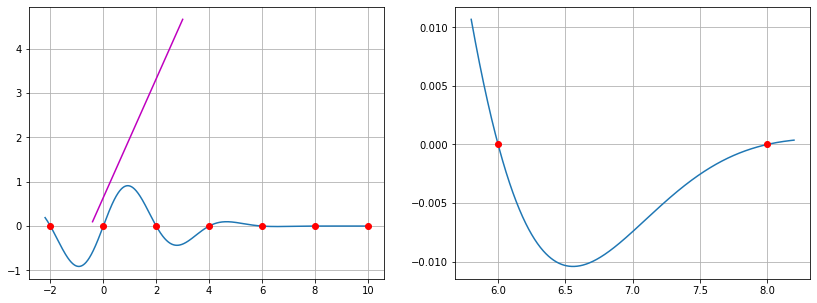

In [174]:
from numpy import vectorize
from pylab import subplot, figure

vg = vectorize(g)
x = linspace(-2.2,10,1000)
figure(figsize=(14,5))
subplot(1,2,1); plot(x,vg(x)); grid(True); plot([-2,0,2,4,6,8,10],[0,0,0,0,0,0,0],'ro');
plot(info[:][0],info[:][1],'m')
x = linspace(5.8,8.2,1000)
subplot(1,2,2); plot(x,vg(x)); grid(True); plot([6,8],[0,0],'ro');

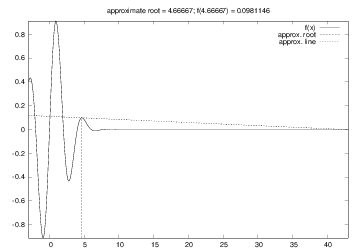

## O Inverso de uma Função  

Dada uma função $f(x)$, a função inversa de $f$, digamos que a chamemos de $g(x)$, tem a propriedade de que se aplicarmos $g$ ao valor $f(x)$, teremos $x$ de volta:  
$$g(f(x)) = x$$  
Da mesma forma, se aplicarmos $f$ ao valor $g(x)$, teremos $x$:  
$$f (g (x)) = x$$  
Geralmente substitui-se $g (x)$ por (digamos) $y$ na equação anterior e a resolve em relação a $y$ para encontrar uma expressão $x$ para a função inversa. Por exemplo, dado $f(x) = x^2−1$, devemos resolver $y^2−1 = x$ em relação a $y$. Para garantir uma solução única para $y$, os valores de $x$ devem ser limitados a um intervalo onde $f(x)$ é monótona, digamos $x \in [0,1]$ no presente exemplo. Resolvendo para $y$ dá $y = \sqrt{1 + x}$, portanto $g(x) = \sqrt{1 + x}$. É fácil verificar que $f(g(x)) = (\sqrt{1 + x})^2−1 = x$.

Numericamente, podemos usar a definição da função inversa $g$ em um ponto de cada vez. Suponha que temos uma sequência de pontos $x_0 x_1 ⋯ x_N$ ao longo do eixo $x$ de modo que $f$ seja monótona em $[x_0, x_N]$: $f(x_0) > f(x_1) > ⋯ > f(x_N)$ ou $f(x_0) < f(x_1) < ⋯ < f(x_N)$. Para cada ponto $x_i$, temos:  

$$f(g(x_i)) = x_i$$
O valor $g(x_i)$ é desconhecido, então vamos chamá-lo de $\gamma$. A equação $f(\gamma) = x_i$ pode ser resolvida para $\gamma$. No entanto, essa equação é em geral não linear se $f$ for uma função não linear de $x$. Devemos então usar, por exemplo, o **método de Newton** para resolvê-la. O **método de Newton** funciona para equações do tipo $f(x) = 0$, que no  nosso caso é $f(\gamma) − x_i = 0$, ou seja, buscamos as raízes da função $F(\gamma) \equiv  f(\gamma) − x_i$. Além disso, precisamos da derivada $F′(\gamma)$ no **método de Newton**. Para simplificar, podemos usar uma diferença finita aproximada:  

$$\begin{equation*} {dF\over d\gamma} \approx {F(\gamma + h) - F(\gamma - h)\over 2h}\end{equation*}$$

Como valor inicial, $\gamma_0$, podemos usar o valor de $g$ calculado previamente: $g_{i − 1}$. Introduzimos a notação compacta $γ = Newton(F, \gamma_0)$ para indicar a solução de $F(\gamma) = 0$ com estimativa inicial $\gamma_0$.

O cálculo de todos os valores $g_0, ..., g_N$ agora pode ser expresso por:
$$g_i =  \textsf{metNewton}(F, g_{i − 1}), \quad i = 1, ..., N$$

e para o primeiro ponto podemos usar $x_0$ como valor inicial (por exemplo):
$$g_0 = \textsf{metNewton}(F, x_0)$$

As duas equações anteriores constituem uma Equação de Diferenças para $g_i$, uma vez que dado $g_{i − 1}$, podemos calcular o próximo elemento da sequência por elas. A equação para $g_i$ é exemplo de Equação de Diferenças Não Linear.

O *script* a seguir calcula a função inversa $g(x)$ de $f(x)$ em alguns pontos discretos $x_0,…, x_N$. Nossa função exemplo é $f(x) = x^2−1$:

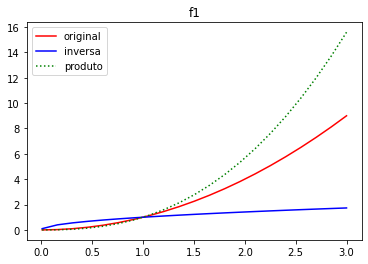

In [11]:
from pylab import legend
from numpy import linspace, zeros
from pylab import plot, title, legend

def f(x):                   # função quadrática
    return x**2

def F(gama):                # função Gama
    return f(gama) - xi

def dFdx(gama):             # primeira derivada da função Gama
    return (F(gama+h) - F(gama-h))/(2*h)

h = 1E-6
x = linspace(0.01, 3, 21)
g = zeros(len(x))
for i in range(len(x)):
    xi = x[i]
    # Calcula o valor de início (usa último g[i-1] se possível)
    if i == 0:
        gama0 = x[0]
    else:
        gama0 = g[i-1]
    gama, n, F_value = metNewton(F, gama0, dFdx)
    g[i] = gama
plot(x, f(x), 'r-', x, g, 'b-', x, f(x)*g, 'g:'); title('f1')
legend(('original', 'inversa','produto'));

Observe que com $f (x) = x^2−1, f′(0) = 0$, então o **método de Newton** divide por zero e quebra, a menos que seja $x_0 > 0$, então aqui, definimos $x_0 = 0,01$. A função $f$ pode ser facilmente editada para permitir que o *script* calcule o inverso de outra função. A função $F$ pode permanecer a mesma, pois aplica uma diferença finita geral para aproximar a derivada da função $f(x)$.

## Exercícios

1. Determine o limite de uma sequência:  
   a) Escreva uma função Python para calcular e retornar a sequência: $$a_n = {7 + 1/(n+1)\over 3 - 1/(n+1)^2},\quad n=0,2,\ldots,N$$  
   b) Escreva uma função Python para calcular e retornar a sequência: $$D_n = {\sin (2^{-n})\over 2^{-n}},\quad n=0,\ldots,N$$  
   c) Dada a sequência: $$D_n = {f(x+h)-f(x)\over h},\quad h = 2^{-n}$$faça uma função `D(f, x, N)` que recebe uma função $f(x)$, um valor $x$ e o número $N$ de termos na sequência como argumentos e retorna a sequência $D_n$ para $n = 0, 1,…, N$. Faça uma chamada para a função `D()` com $f(x) = sen(x), x = 0$ e $N = 80$. Trace a evolução dos valores $D_n$ calculados, usando pequenos círculos para os pontos de dados.
   d) Faça outra chamada para `D()` onde $x = \pi$ e plote essa sequência em uma figura separada. Qual seria o seu limite esperado?
   e) Explique por que os cálculos para $x = \pi$ dão errado para $N$ grande.

*Dica*: Imprima o numerador e denominador em $D_n$.

2. Calcule $\pi$ por meio de sequências:
   Todas as seguintes sequências convergem para $\pi$:
   $$\begin{align*}
(a_n)_{n=1}^\infty, \quad a_n &= 4\sum_{k=1}^n {(-1)^{k+1}\over 2k-1},\\ 
(b_n)_{n=1}^\infty, \quad b_n &= \left(6\sum_{k=1}^n k^{-2}
\right)^{1/2},\\ 
(c_n)_{n=1}^\infty, \quad c_n &= \left(
90\sum_{k=1}^n k^{-4}\right)^{1/4},\\ 
(d_n)_{n=1}^\infty, \quad d_n &= {6\over\sqrt{3}}
\sum_{k=0}^n {(-1)^{k}\over 3^k(2k+1)},\\ 
(e_n)_{n=1}^\infty, \quad e_n &= 16
\sum_{k=0}^n {(-1)^{k}\over 5^{2k+1}(2k+1)}
- 4\sum_{k=0}^n {(-1)^{k}\over 239^{2k+1}(2k+1)}
\end{align*}$$

Faça uma função para cada sequência que retorna um vetor com os elementos da sequência. Trace todas as sequências e encontre aquela que converge mais rapidamente para o limite $\pi$.

3. Reduza o uso de memória de equações de diferença:  
   Considere o _script_ de crescimento em anos da seção **Taxas de juros**. Como $x_n$ depende de $x_{n − 1}$ apenas, não precisamos armazenar todos os $N + 1$ valores de $x_n$. Na verdade, só precisamos armazenar $x_n$ e seu valor anterior $x_{n − 1}$. Modifique o programa para usar duas variáveis e não um vetor para guardar toda a sequência. Evite também a lista `tempo` e use um contador de inteiros para `n` e um loop `while`. Grave a sequência em um arquivo de forma que possa ser visualizada posteriormente.

4. Resolva um sistema de Equações de Diferenças:  
   Resolva as seguintes equações em uma função Python e plote a sequência $x_n$. 
$$\begin{align}
x_n &= x_{n-1} + {p\over 100}x_{n-1} - c_{n-1},\quad x_0=F,\ c_0 = {pq\over 10^4}F,\\ 
c_n &= c_{n-1} + {I\over100}c_{n-1}
\end{align}$$

5. Construia pontos de tempo a partir de datas  
   Uma certa quantia $p$ (que pode ser uma taxa de juros) é constante por partes e sofre alterações em algumas datas específicas, por exemplo:
$$\begin{equation}  
p \hbox{ muda para }  
\left\lbrace\begin{array}{ll}  
4.5 &  \hbox{em 04/01/2019} \\ 
4.75 & \hbox{em 21/03/2019} \\ 
6.0 &  \hbox{em 01/04/2019} \\ 
5.0 &  \hbox{em 30/06/2019} \\ 
4.5 &  \hbox{em 11/11/2019} \\ 
2.0 &  \hbox{em 05/04/2020}
\end{array}\right.
\end{equation}$$

6. Visualize a convergência do **método de Newton**:  
   Seja $x_0, x_1,…, x_N$ a sequência de raízes geradas pelo **método de Newton** aplicado a uma equação algébrica não linear $f(x) = 0$ (consulte a seção **Método de Newton**). Neste exercício, o objetivo é traçar as sequências $(x_n)_{n=0}^N$ e $(|f(x_n)|)_{n=0}^N$ de modo que possamos entender como o **método de Newton** converge ou diverge.

   a) Faça uma função geral: `Newton_plot(f, x, dfdx, xmin, xmax, epsilon=1E-7)` para este propósito. Os argumentos `f` e `dfdx` são funções Python que representam a função $f(x)$ na equação e sua derivada $f ′ (x)$, respectivamente. O **método de Newton** é executado até $|f(x_N)|\leq\epsilon$, e o valor $\epsilon$ está disponível como o argumento `épsilon`. A função `Newton_plot()` deve fazer três gráficos separados de $f (x)$, $(x_n)_{n = 0}^N$ e $(| f (x_n) |)_{n = 0}^N$ na tela e também salvar esses gráficos em arquivos PNG. O intervalo $x$ relevante para a plotagem de $f (x)$ é dado pelos argumentos `xmin` e `xmax`. Devido à escala potencialmente ampla de valores que $| f (x_n) |$ pode exibir, pode ser sábio usar uma escala logarítmica no eixo $y$.  
   
   b) Demonstre a função na equação $x^6sen(\pi x) = 0$, com $\epsilon = 10^{−13}$. Tente diferentes valores iniciais para o **método de Newton**: $x_0 = −2,6,−1,2,1.5,1.7,0,6$. Compare os resultados com as soluções exatas $x =…,−2−1,0,1,2,…$  
   
   c) Use a função `Newton_plot()` para explorar o impacto do ponto de partida $x_0$ ao resolver as seguintes equações algébricas não lineares:  
$$\begin{align}
\sin x &= 0,\\ 
x &= \sin x,\\ 
x^5 &= \sin x,\\ 
x^4\sin x &= 0,\\ 
x^4 &= 16,\\ 
x^{10} &= 1,\\ 
\tanh x &= 0,\\
\tanh x &= x^{10}
\end{align}$$

**Fonte**: Langtangen, H.P.; "A Primer on Scientific Programming with Python"; 5ª edição, Springer, 2016.  
Disponível em http://hplgit.github.io/primer.html/doc/pub/diffeq/._diffeq-readable001.html#sec:diffeq:integral, acessado em 27/05/2021.